# Fallstudie 2: Dekomposition und Komposition

#### Marcel Lüthi, Departement Mathematik und Informatik, Universität Basel

In dieser Fallstudie besprechen wir zusammen, wie wir mit Hilfe von Funktionen ein Problem zerlegen und, auf flexible Art und Weise, wieder zusammenbauen können. Das konkrete Problem, an welchem wir die Strategie veranschaulichen, ist das Zeichnen einer Stadt. 

### Problemstellung

![city](images/city.png)

Unsere Aufgabe ist es, die obige Stadt zu zeichnen. Statt einfach nur genau die Stadt zu zeichnen, wollen wir nützliche Abstraktionen einführen, die uns nicht nur ermöglichen genau diese Stadt zu zeichnen, sondern auch andere Städte, Häuser und Hochhäuser. Vielleicht schaffen wir es sogar Abstraktionen zu schaffen, die für andere Anwendungen nützlich sind. 

### Laden der Turtle Bibliothek

Da wir Zeichnungen mit Turtlegrafik erstellen, müssen wir zuerst die Bibliothek laden und die Befehle zur Verfügung stellen. Dies machen wir mit den zwei folgenden Zellen, die sie noch nicht verstehen müssen. 

In [2]:
%mavenRepo shapemodelling-repo https://shapemodelling.cs.unibas.ch/repo/
%maven ch.unibas.informatik:jturtle:0.7

In [3]:
import static ch.unibas.informatik.jturtle.TurtleCommands.*;
import java.awt.Color;

### Strategie

Das Problem als Ganzes zu lösen ist schwierig. Wir überlegen uns stattdessen zuerst, wie wir dieses Problem in kleinere Teile zerlegen können. Jeden Teil implementieren wir dann als eine Methode. Unser Ziel ist es, die Methoden allgemein zu schreiben, so dass wir Sie in vielen unterschiedlichen Situationen einsetzen können. 

#### Miniübungen 

* Welche kleineren Probleme würden Sie lösen?
* Überlegen Sie sich, was geeignete Methoden wären um diese kleineren Probleme zu lösen. 
    * Was ist der Name der Methoden?
    * Was ist der Rückgabewert der Methoden?


### Schritt 1: Zeichnen der geometrischen Figuren

Die einfachsten Elemente für unsere Zeichung sind die geometrischen Formen *Dreieck* und *Rechteck*. Die einfachste Implementation sieht wie folgt aus:

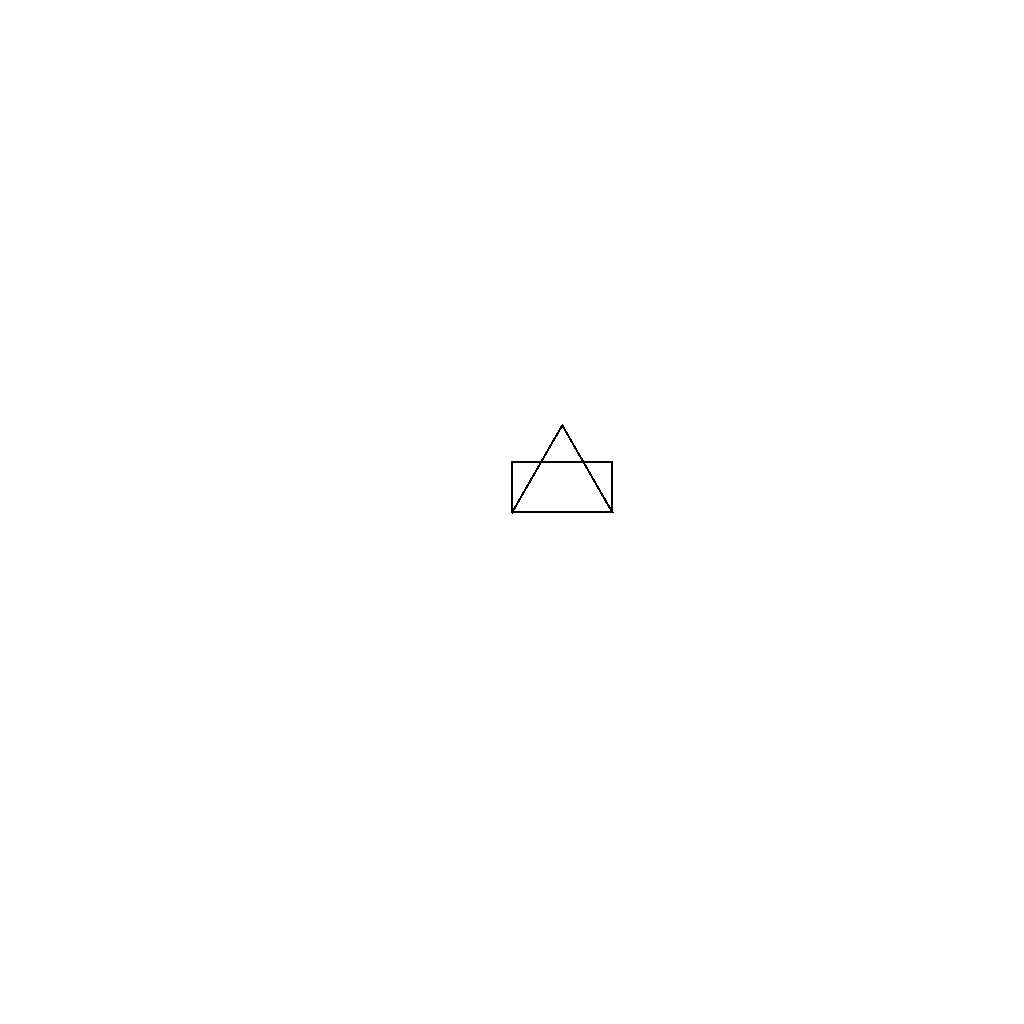

In [4]:
class Shapes {

    public static void drawRectangle() {
        double height = 10;
        double width = 20;
        
        reset(); // set turtle to origin and make it face upwards
        penDown();
        forward(height);
        turnRight(90);
        forward(width);
        turnRight(90);
        forward(height);
        turnRight(90);
        forward(width);        
    }

    public static void drawTriangle() {
        double length = 20;
        
        reset();
        penDown();        
        turnRight(90);
        forward(length);
        turnLeft(120);
        forward(length);
        turnLeft(120);
        forward(length);
        turnLeft(120);        
    }
    
    public static void main(String[] args) {
        clear();
        reset();
        drawRectangle();
        drawTriangle();
        display(drawing());
    }
}

Shapes.main(new String[0]);

### Miniübungen

* Passen Sie die Methoden `drawRectangle` und `drawTriangle` so an, dass diese die Höhe und Breite, respektive die Länge, als Parameter entgegennehmen. 
     * Passen Sie auch den Aufruf in der `main`-Methode entsprechend an. 
* Passen Sie die Methoden so an, dass diese auch die Anfangsposition als Parameter entgegennehmen. 
     * Nutzen Sie die Methode `goTo(x,y)` um das Turtle an die Position mit der Koordinate $(x, y)$ zu setzen. 

* Für ganz Schnelle: Können Sie die Felder mit einer Farbe ausfüllen?

### Schritt 2: Zeichnen von Häusern und Wolkenkratzern

Wir gehen nun in der Abstaktion einen Grad höher. Aus einem Rechteck und einem Dreieck können wir ein Haus zeichnen. 


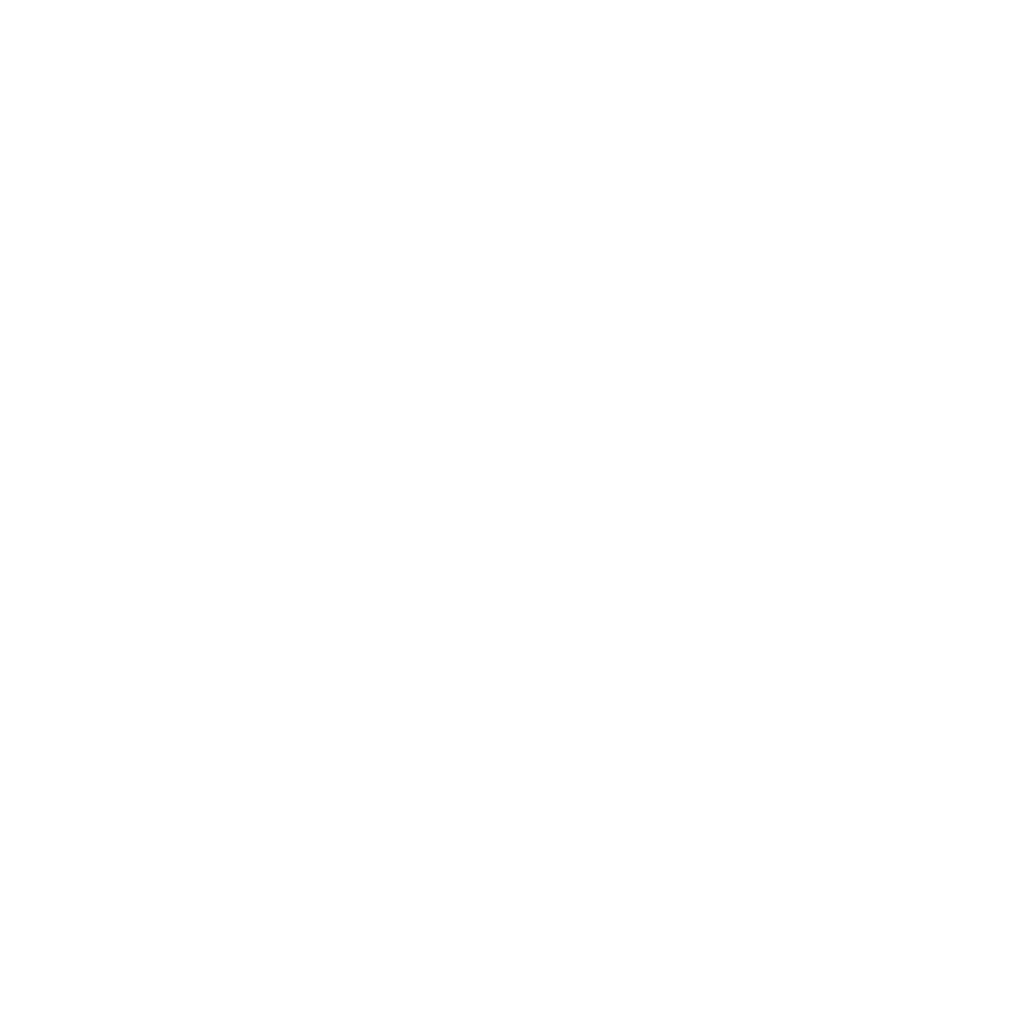

In [5]:
class Houses {
    
    
    public static void drawHouse(int x, int y, double width, double height) { 
    }
 
    
    public static void main(String[] args) {
        clear();
        drawHouse(10, 10, 20, 20);
        
        display(drawing());
    }
        
}
Houses.main(new String[0]);
          


#### Miniübung 

* Implementieren Sie eine Methode, die einen 4-Stöckigen Häuserblock zeichnet. Welche Parameter braucht Ihre Methode?
* Implementien Sie eine Methode, die mithilfe von 3 Häusern ein Reihenhaus macht. 

### Kirchen und Flachdächer 

Bisher sind unsere Häuser langweilig. Wir werden uns deshalb die Form der Dächer etwas genauer anschauen. Anstatt nur gleichseitige Dreiecke zuzulassen, erweitern wir unser Programm so, dass wir wir beliebige gleichschenklige Dreiecke zeichnen könenn. Die erlaubt uns auch neue Abstraktionen wie Kirchen, etc. einzuführen. Gleichzeitig können wir damit zeigen, dass nicht nur void-Methoden, sondern auch Methoden mit Rückgabewert einen wichtigen Platz in der Programmierung einnehmen. 

Unser nächstes Ziel ist also ein Dreieck zeichnen zu können, bei dem die Basis und die Seitenlänge angegeben wird. 

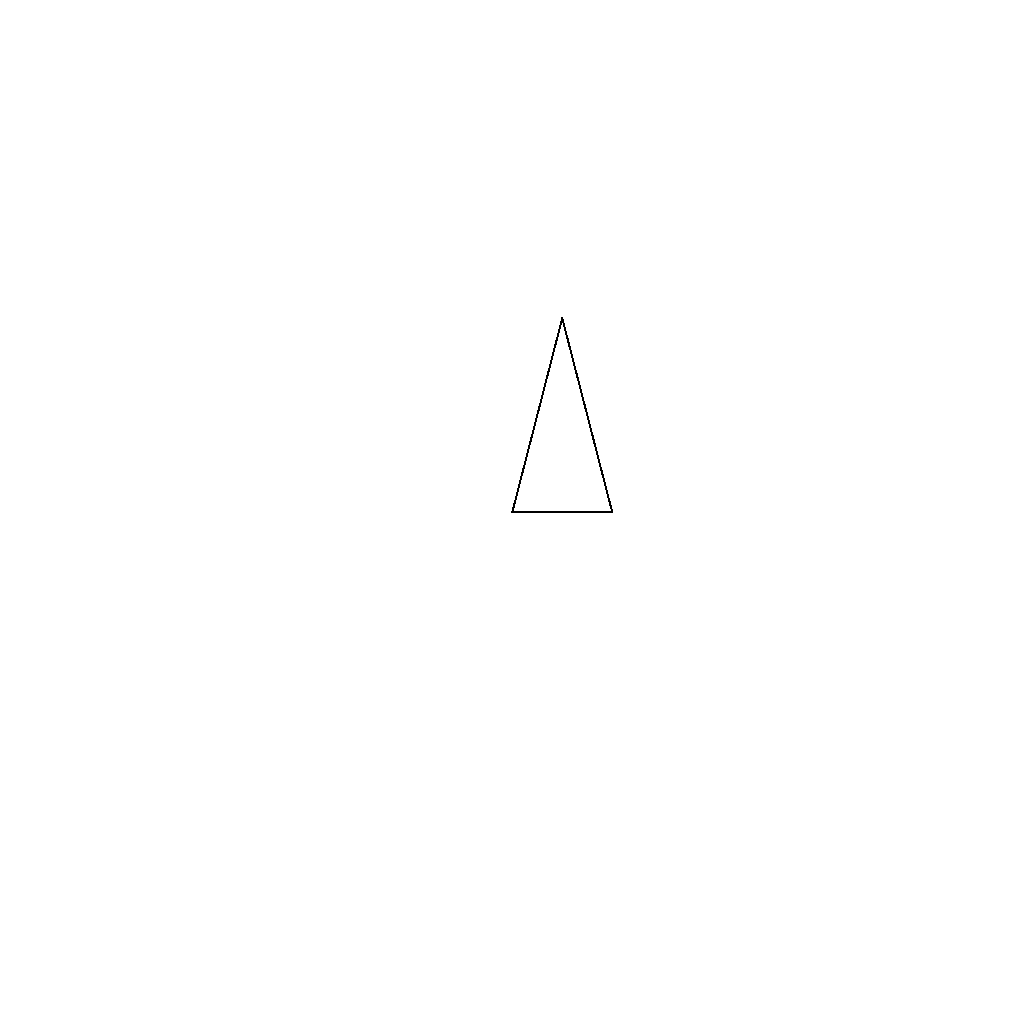

In [6]:
class Triangle {

    public static void drawTriangle(double xPos, double yPos, double lengthBase, double lengthLeg) {
        reset();
        penUp();
        goTo(xPos, yPos);
        penDown();        
        
        double baseAngle = computeBaseAngle(lengthBase, lengthLeg); // gamma is the isoceles angle
        double vertexAngle = 180 - 2 * baseAngle;
        penDown();
        turnRight(90);
        forward(lengthBase);
        turnLeft(180 - baseAngle);
        forward(lengthLeg);
        turnLeft(180 - vertexAngle);
        forward(lengthLeg);
    }
    
    public static double computeBaseAngle(double lengthBase, double lengthLeg) {
        return Math.acos(lengthBase / (2 * lengthLeg)) / (2 * Math.PI) * 360;
    }
    
    public static void main(String[] args) {
        clear();
        reset();
        drawTriangle(0, 0, 20, 40);
        
        display(drawing());
    }
}

Triangle.main(new String[0]);


#### Miniübung

* Schreiben Sie eine Methode ```radToDegree```, die einen Winkel im Bogenmass in einen Winkel in Grad umwandelt. Nutzen Sie diese um die Berechnung des Winkels verständlicher zu machen. 

### Endlösung

Mit den oben definierten Methoden können wir nun beliebig komplexe Städte zeichnen. Lassen Sie Ihrer Fantasie freien Lauf. Eine mögliche Lösung ist im Lösungsnotebook gegeben, welches im Menu *Fallstudien* der Vorlessungsseite verlinkt ist. 

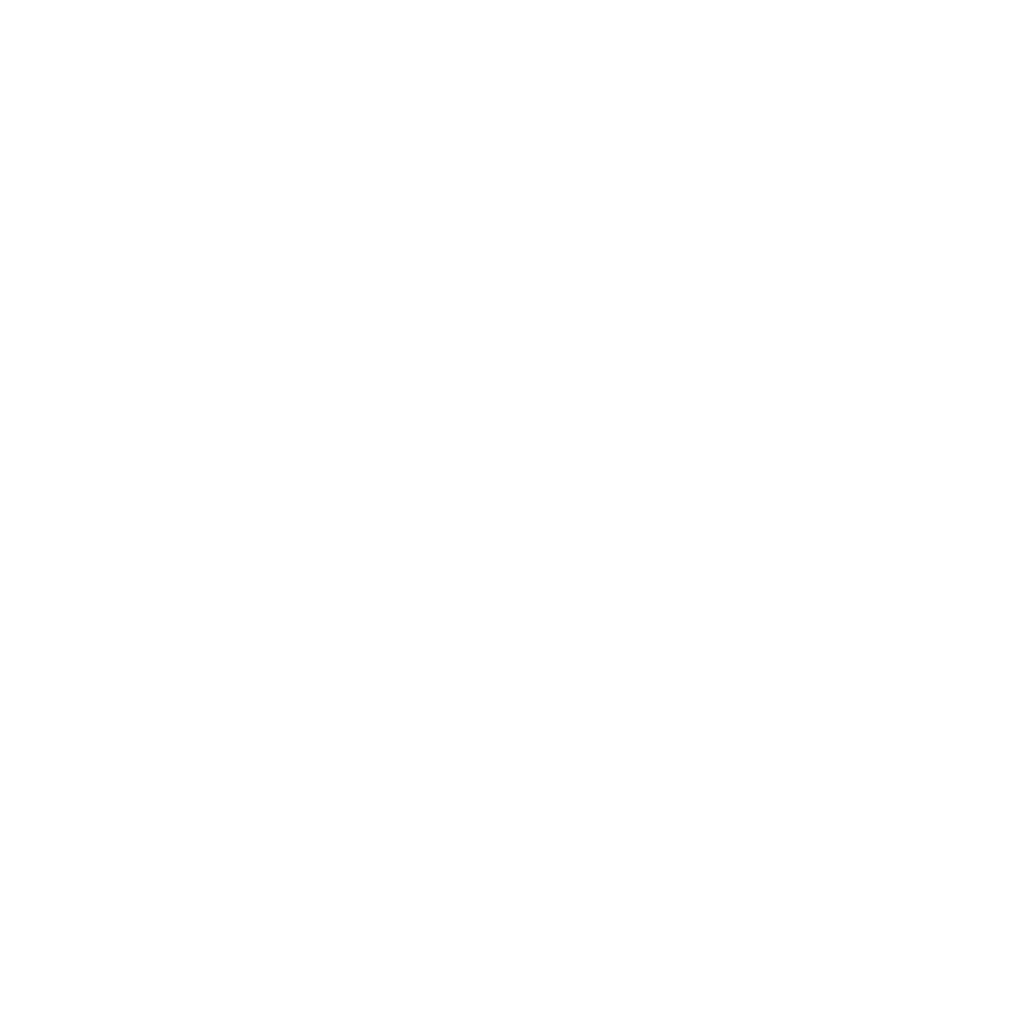

In [7]:
class City {
  
         
    public static void main(String[] args) {
        reset();
        clear();
  
        // Ihr Zeichencode
        
        display(drawing());
    }
        
}
City.main(new String[0]);
          
